In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

In [3]:
# importing dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded1 = files.upload()

Saving test.csv to test.csv


# **IMPORTING**

In [50]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [51]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded1['test.csv']))

In [52]:
df_train.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [53]:
df_train

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


# **SINGLE (number of y) SIMPLE (number of x) LINEAR (type of model) REGRESSION**

In [8]:
x_train=df_train["danceability"].values.reshape(-1, 1) #https://www.alpharithms.com/wp-content/uploads/1186/reshaping-illustration-rows-vs-columns-1024x576.jpg
y_train=df_train["popularity"].values

x_test=df_test["danceability"].values.reshape(-1, 1)
y_test=df_test["popularity"].values

In [9]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [10]:
print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficient:  [4.88479808]
Intercept:  24.731833130775186


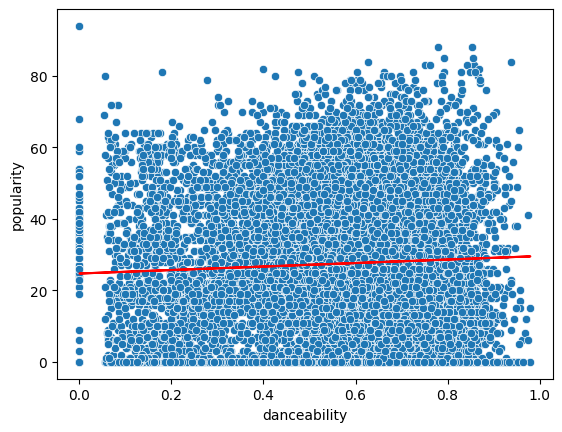

In [11]:
sns.scatterplot(data=df_train, x="danceability", y="popularity")
plt.plot(x_train, reg.coef_*x_train+reg.intercept_, c="red")

Il grafico a dispersione o scatterplot non mostra alcuna relazione tra le 2 variabili scelte così come il calcolo della correlazione di Person ci ha suggerito all'inizio restituendoci un valore pari a 0.05 .
Il calcolo della regressione lineare ha però evidenziato una "dipendenza" positiva poiché ad un aumento di 1 unità della variabile "danceability", la "popolarity" aumenta di circa 4.9 .





In [12]:
y_pred = reg.predict(x_test)

In [13]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.004
MSE: 346.469
MAE: 15.500


Questi valori evidenziano l'incapacità predittiva della variabile danceability sulla popularity. La proporzione della varianza della popularity "predetta" è pressoché nulla (R2= 0.004) mentre il numero di errori è molto alto, del resto la retta di regressione "fitta" molto male il training set.


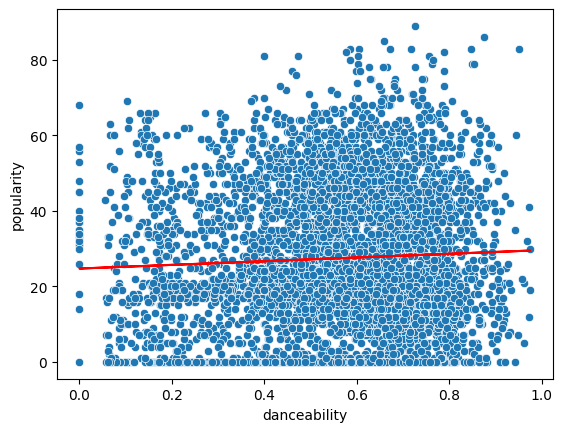

In [14]:
sns.scatterplot(data=df_test, x="danceability", y="popularity")
plt.plot(x_test, reg.coef_*x_test+reg.intercept_, c="red")

Utilizzare Ridge o Lasso regression nel caso di una simple linear regression non ha senso. Queste vanno bene in contesti di multiple regressions dove le features esplicative sono molteplici.

Coefficient:  [0.04884798]
Intercept:  0.2473183313077518
R2: 0.004
MSE: 0.035
MAE: 0.155


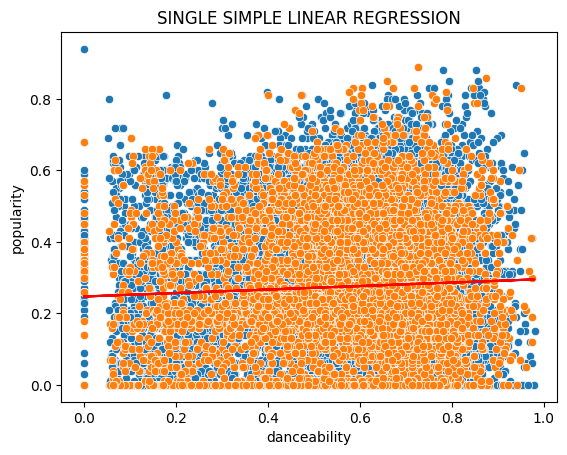

In [15]:
#Setting trainset popularity as a %
df_train['popularity'] /= 100
#Setting testset popularity as a %
df_test['popularity'] /= 100


x_train=df_train["danceability"].values.reshape(-1, 1)
y_train=df_train["popularity"].values

x_test=df_test["danceability"].values.reshape(-1, 1)
y_test=df_test["popularity"].values


reg=LinearRegression()
reg.fit(x_train, y_train)


print("Coefficient: ", reg.coef_)
print("Intercept: ", reg.intercept_)


sns.scatterplot(data=df_train, x="danceability", y="popularity")
plt.plot(x_train, reg.coef_*x_train+reg.intercept_, c="red")


y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_test, x="danceability", y="popularity")
plt.plot(x_test, reg.coef_*x_test+reg.intercept_, c="red")
plt.title("SINGLE SIMPLE LINEAR REGRESSION")
plt.show()


# **SINGLE MULTIPLE LINEAR REGRESSION**

## ***data preparation***

Si è deciso di performare uno studio di regressione multipla per la "popularity" con tutte le variabili quantitative continue a nostra disposizione.

è necessario pertanto fare un po' di data preparation. In particolare, abbiamo rimosso tutte le variabili categoriche e non quantitative e popularity_confidence in quanto mancante nell'80% circa dei patterns; e gestito i missing values. Si è deciso di lasciare le variabili ridondanti come "features_duration_ms" con "duration_ms", "n_bars" con "n_beats" e "processing" con "key" per osservare i risultati delle regressioni con regolarizzazione in questo palese caso di multicollinearità.

In [16]:
column2drop = ['name', 'album_name', 'explicit', 'artists', 'key', 'mode', 'time_signature', 'genre', 'popularity_confidence']
df_train.drop(column2drop, axis=1, inplace=True)
df_test.drop(column2drop, axis=1, inplace=True)

In [17]:
df_train

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,n_beats,n_bars,processing
0,241760,0.46,0.690,0.513,-12.529,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,241760,567.0,141.0,1.279305
1,444000,0.00,0.069,0.196,-24.801,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,444000,617.0,155.0,2.367412
2,333506,0.03,0.363,0.854,-7.445,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,333507,652.0,162.0,3.700483
3,269800,0.23,0.523,0.585,-5.607,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,269800,619.0,155.0,1.279305
4,307651,0.25,0.643,0.687,-11.340,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,307652,733.0,183.0,4.067086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,432026,0.00,0.554,0.657,-14.232,0.0558,0.016000,0.615000,0.1320,0.0335,117.319,432027,837.0,212.0,2.367412
14996,182746,0.44,0.103,0.860,-19.627,0.0595,0.548000,0.940000,0.1230,0.0016,92.323,182747,277.0,92.0,2.367412
14997,400091,0.43,0.799,0.535,-9.103,0.0594,0.001830,0.857000,0.0713,0.0708,126.000,400091,837.0,209.0,2.367412
14998,197250,0.37,0.511,0.970,-2.299,0.0531,0.000337,0.000014,0.4020,0.2700,160.044,197250,513.0,130.0,1.279305


In [18]:
#Changing udm to duration_ms and features_duration_ms from ms to min
df_train['duration_ms'] *= 1/6e4
df_test['duration_ms'] *= 1/6e4

df_train['features_duration_ms'] *= 1/6e4
df_test['features_duration_ms'] *= 1/6e4

In [19]:
df_train.rename(columns = {'duration_ms':'duration_min'}, inplace = True)
df_train.rename(columns = {'features_duration_ms':'features_duration_min'}, inplace = True)

df_test.rename(columns = {'duration_ms':'duration_min'}, inplace = True)
df_test.rename(columns = {'features_duration_ms':'features_duration_min'}, inplace = True)

'''df_train.rename(columns = {'popularity':'popularity_percent'}, inplace = True)
df_test.rename(columns = {'popularity':'popularity_percent'}, inplace = True)'''

"df_train.rename(columns = {'popularity':'popularity_percent'}, inplace = True)\ndf_test.rename(columns = {'popularity':'popularity_percent'}, inplace = True)"

In [20]:
df_train["popularity"].unique()

array([0.46, 0.  , 0.03, 0.23, 0.25, 0.32, 0.27, 0.64, 0.45, 0.21, 0.19,
       0.22, 0.51, 0.57, 0.01, 0.14, 0.53, 0.2 , 0.18, 0.13, 0.28, 0.55,
       0.12, 0.33, 0.08, 0.26, 0.5 , 0.49, 0.44, 0.56, 0.67, 0.43, 0.17,
       0.42, 0.11, 0.07, 0.37, 0.58, 0.02, 0.06, 0.52, 0.41, 0.4 , 0.48,
       0.24, 0.16, 0.31, 0.15, 0.7 , 0.05, 0.04, 0.34, 0.29, 0.3 , 0.6 ,
       0.35, 0.38, 0.39, 0.63, 0.61, 0.59, 0.71, 0.1 , 0.65, 0.09, 0.47,
       0.36, 0.81, 0.54, 0.69, 0.74, 0.78, 0.68, 0.66, 0.62, 0.73, 0.8 ,
       0.72, 0.75, 0.77, 0.83, 0.88, 0.76, 0.85, 0.82, 0.79, 0.84, 0.94])

## ***linear regression analysis***

### *linear regression* con features ridondanti


In [21]:
#x_of_reg=["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]
x_train = df_train[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]].values
y_train = df_train["popularity"].values

x_test = df_test[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]].values
y_test = df_test["popularity"].values

con il reshape() mi dà errore quando fitto.

In [22]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 5.24347659e-03  3.57345345e-02 -4.32821872e-02 -2.26365463e-04
 -2.64760860e-01  2.60708434e-02 -1.42861761e-01  2.64202283e-02
 -1.34877432e-02  2.21785759e-05 -5.41183317e-03  6.96150861e-05
 -3.91438737e-04 -2.04353922e-04]
Intercept: 
 0.3500520361053938


In [24]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.118
MSE: 0.031
MAE: 0.144


Nonostante aver usato tutte le variabili quantitative continue a nostra disposizione, la percentuale di varianza spiegata della "popularity" è molto bassa, il 12%.

### *linear regression* senza features ridondanti: n_bars, processing, features_duration_min.

In [25]:
x_train = df_train[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "n_beats"]].values
y_train = df_train["popularity"].values

x_test = df_test[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "n_beats"]].values
y_test = df_test["popularity"].values

In [26]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-7.36924703e-04  4.02644473e-02 -4.17776563e-02 -2.09629866e-04
 -2.67982490e-01  2.46935305e-02 -1.42735471e-01  2.67162010e-02
 -1.34952287e-02  1.26471042e-05 -3.00929942e-05]
Intercept: 
 0.3501541592949221


In [28]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.117
MSE: 0.031
MAE: 0.144


Logicamente non è cambiato nulla in quanto le features in questione erano appunto ridondanti, troppo correlate con altre.

### *ridge regression* con

RECALL: ridge regression with alpha = 0 is least squares!


Which alpha we should choose to tune the model?

generation an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [29]:
x_train = df_train[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]].values
y_train = df_train["popularity"].values

x_test = df_test[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]].values
y_test = df_test["popularity"].values

In [30]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. In this case, it is a  18×100
  matrix, with 18 rows (one for each predictor) and 100 columns (one for each value of alpha). Remember that we'll want to standardize the variables so that they are on the same scale.

In [31]:
from sklearn import preprocessing
df_train_scaled = preprocessing.scale(df_train)
df_test_scaled = preprocessing.scale(df_test)
df_train_scaled=pd.DataFrame(df_train_scaled, columns = df_train.columns)
df_test_scaled=pd.DataFrame(df_test_scaled, columns = df_test.columns)

In [32]:
x_train = df_train_scaled[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]].values
y_train = df_train_scaled["popularity"].values

x_test = df_test_scaled[["duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"]].values
y_test = df_test_scaled["popularity"].values

In [33]:
#initialize list to store coefficient values
coefs = []
alphas = range(0,100)

for a in alphas:
    ridge=Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 14)

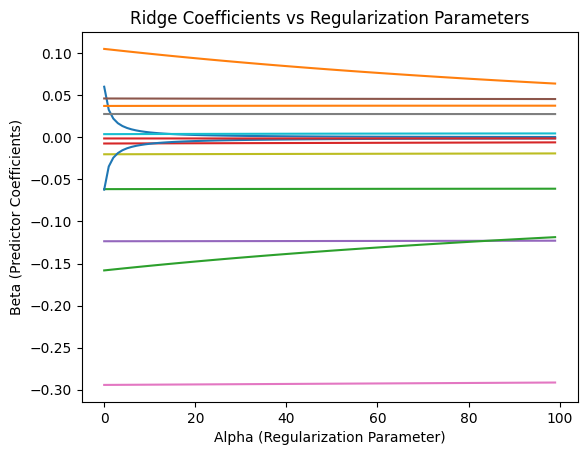

In [34]:
# Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coefs)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
fig.savefig('coef_vs_alpha.png')

even if it's not too much evident, this plot shows the power of the ridge regression: as alpha increases, the coefficients decreases from their original value, or better they shrunk toward zero and each other. This limits the multicollinearity between (variables) predictors.

which alpha to choose so?

we can select the optimal alpha through generalized cross validation.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

# Selecting lambda
# Fit Ridge regression through cross validation
reg_cv=RidgeCV(alphas=range(1,100))
reg_cv.fit(x_train, y_train)

reg_cv.alpha_

99

In [36]:
reg_ridge = Ridge(alpha= reg_cv.alpha_)
reg_ridge.fit(x_train, y_train)
print('Coefficients: \n', reg_ridge.coef_)
print('Intercept: \n', reg_ridge.intercept_)

Coefficients: 
 [ 0.00042675  0.03764601 -0.06105153 -0.00596887 -0.12286765  0.04555359
 -0.29146355  0.02769348 -0.01910725  0.00465445 -0.00120787  0.06394652
 -0.1186448  -0.00125473]
Intercept: 
 2.371735610918897e-16


As expected, none of the coefficients are exactly zero - ridge regression does not perform variable selection!

In [37]:
y_pred=reg_ridge.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.118
MSE: 0.882
MAE: 0.771


### *lasso regression* con

In [38]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(max_iter = 10000)
coef = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coef.append(lasso.coef_)

np.shape(coef)

<ipython-input-38-bb5f3dbd2c5e>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+03, tolerance: 1.500e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


(100, 14)

In [39]:
lasso_cv=LassoCV(alphas=range(0,100))
lasso_cv.fit(x_train, y_train)

lasso_cv.alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5396.990875752754, tolerance: 1.2024386794042676
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did

0

https://stats.stackexchange.com/questions/601899/what-does-it-mean-for-alpha-to-be-0-when-tuning-lasso-regressor-with-cross-valid

pensare su scrivere o meno che per ridge il range e 1,100 mentre per lasso e 0,100.

In [40]:
#"0:duration_min", "1:danceability", "2:energy", "3:key", "4:loudness", "5:mode", "6:speechiness", "7:acousticness", "8:instrumentalness", "9:liveness", "10:valence", "11:tempo", "12:features_duration_min", "13:time_signature", "14:n_beats", "15:n_bars", "16:processing"

reg_lasso = Lasso(alpha= 0.01)
reg_lasso.fit(x_train, y_train)
print('Coefficients: \n', reg_lasso.coef_)
print('Intercept: \n', reg_lasso.intercept_)
pd.DataFrame(reg_lasso.coef_)

Coefficients: 
 [-0.          0.01437001 -0.05609246 -0.         -0.11156805  0.03728942
 -0.2783983   0.01330355 -0.         -0.         -0.         -0.
 -0.04913998 -0.        ]
Intercept: 
 2.432699557411816e-16


,0
0,-0.000000
1,0.014370
2,-0.056092
3,-0.000000
4,-0.111568
5,0.037289
6,-0.278398
7,0.013304
8,-0.000000
9,-0.000000


proprietà della regorizzazione di Lasso: feature selection. Nella nostra analisi, con alpha ottimo mediante cross validation, tutte = 0 pertanto tutte le variabili are useless and redundant. Con alpha molto piccolo(=0.01) 9 variabili risultano influenzare la popolarità.
"duration_min", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "features_duration_min", "n_beats", "n_bars", "processing"

In [41]:
y_pred_lasso=reg_lasso.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred_lasso))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_lasso))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_lasso))

R2: 0.115
MSE: 0.885
MAE: 0.774


## ***non linear regression analysis***

### *decision tree*

In [42]:
reg_tree = DecisionTreeRegressor()

In [43]:
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [44]:
y_pred_tree = reg_tree.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred_tree))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_tree))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_tree))

R2: -0.638
MSE: 1.638
MAE: 0.985


### *knn*

In [45]:
reg_knn = KNeighborsRegressor()

In [46]:
reg_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [47]:
y_pred_knn = reg_knn.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred_knn))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred_knn))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred_knn))

R2: 0.109
MSE: 0.891
MAE: 0.736
